from: https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html and Rosenbrock description from Wikipedia

n mathematical optimization, the Rosenbrock function is a non-convex function, introduced by Howard H. Rosenbrock in 1960, which is used as a performance test problem for optimization algorithms.[1] It is also known as Rosenbrock's valley or Rosenbrock's banana function.

The global minimum is inside a long, narrow, parabolic shaped flat valley. To find the valley is trivial. To converge to the global minimum, however, is difficult.

The function is defined by

{\displaystyle f(x,y)=(a-x)^{2}+b(y-x^{2})^{2}} f(x,y)=(a-x)^{2}+b(y-x^{2})^{2}

It has a global minimum at {\displaystyle (x,y)=(a,a^{2})} (x,y)=(a,a^{2}), where {\displaystyle f(x,y)=0} f(x,y)=0. Usually these parameters are set such that {\displaystyle a=1} a=1 and {\displaystyle b=100} b=100. Only in the trivial case where {\displaystyle a=0} a=0 is the function symmetric and the minimum at the origin.

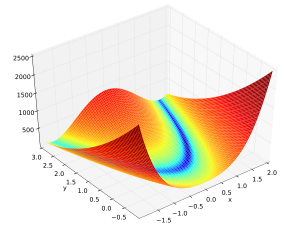

## minimize(method=’Nelder-Mead’)

scipy.optimize.minimize(fun, x0, args=(), method='Nelder-Mead', tol=None, callback=None, options={'disp': False, 'initial_simplex': None, 'maxiter': None, 'xatol': 0.0001, 'return_all': False, 'fatol': 0.0001, 'func': None, 'maxfev': None})
Minimization of scalar function of one or more variables using the Nelder-Mead algorithm.
See also 
For documentation for the rest of the parameters, see scipy.optimize.minimize


Options: 

disp : bool Set to True to print convergence messages.

maxiter, maxfev : int Maximum allowed number of iterations and function evaluations. Will default to N*200, where N is the number of variables, if neither maxiter or maxfev is set. If both maxiter and maxfev are set, minimization will stop at the first reached.

initial_simplex : array_like of shape (N + 1, N)

Initial simplex. If given, overrides x0. initial_simplex[j,:] should contain the coordinates of the j-th vertex of the N+1 vertices in the simplex, where N is the dimension.

xatol : float, optional

Absolute error in xopt between iterations that is acceptable for convergence.

fatol : number, optional Absolute error in func(xopt) between iterations that is acceptable for convergence.

In [10]:
import numpy as np
import time
from scipy.optimize import minimize

def rosen(x):
     """The Rosenbrock function"""
     return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

In [11]:
startTime = time.time()
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead',
                options={'xtol': 1e-8, 'disp': True})
endTime = time.time()
print('This took %s seconds' % (endTime - startTime))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571
This took 0.024045467376708984 seconds


In [12]:
print(res.x)

[ 1.  1.  1.  1.  1.]


## Broyden-Fletcher-Goldfarb-Shanno algorithm  ( a gradient descent algorithm)

In [17]:
def rosen_der(x):
     xm = x[1:-1]
     xm_m1 = x[:-2]
     xm_p1 = x[2:]
     der = np.zeros_like(x)
     der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
     der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
     der[-1] = 200*(x[-1]-x[-2]**2)
     return der

In [21]:
startTime = time.time()
res = minimize(rosen, x0, method='BFGS', jac=rosen_der,
                options={'disp': True})
endTime = time.time()
print('This took %s seconds' % (endTime - startTime))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30
This took 0.00500798225402832 seconds


In [22]:
print(res.x)

[ 1.00000004  1.0000001   1.00000021  1.00000044  1.00000092]


## Newton-Conjugate-Gradient algorithm (another form of gradient descent)

In [23]:
def rosen_hess(x):
     x = np.asarray(x)
     H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
     diagonal = np.zeros_like(x)
     diagonal[0] = 1200*x[0]**2-400*x[1]+2
     diagonal[-1] = 200
     diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
     H = H + np.diag(diagonal)
     return H

In [24]:
startTime = time.time()
res = minimize(rosen, x0, method='Newton-CG',
                jac=rosen_der, hess=rosen_hess,
                options={'xtol': 1e-8, 'disp': True})
endTime = time.time()
print('This took %s seconds' % (endTime - startTime))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 33
         Gradient evaluations: 56
         Hessian evaluations: 24
This took 0.008013010025024414 seconds
